# Ejercicios OpenSource con sklearn.datasets

---



##Regresión lineal al dataset  load_boston


###Librerías necesarias

In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

%matplotlib inline

### cargamos los datos de la biblioteca scikit-learn

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

###Conociendo los datos que tiene el dataset

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


*   datos/data: contiene la información de varias casas
*   feature_names: nombres de las características
*   DESCR: describe el conjunto de datos
*   **objetivo/traget: los precios de la casa (caracterista más relevante)**
---


Conociendo las caracteristicas que tienen los datos:

In [ ]:
boston_dataset.DESCR

*   CRIM: Tasa de delincuencia per cápita por ciudad
*   ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
*   INDUS: Proporción de acres comerciales no minoristas por ciudad
*   CHAS: Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
*   NOX: concentración de óxido nítrico (partes por 10 millones)
*   RM: Número medio de habitaciones por vivienda
*   EDAD: Proporción de unidades ocupadas por el propietario construidas antes de 1940
*   DIS: distancias ponderadas a cinco centros de empleo de Boston
*   RAD: Índice de accesibilidad a carreteras radiales
*   TAX/IMPUESTO: Tasa de impuesto a la propiedad de valor total por USD 10.000
*   PTRATIO: Proporción alumno/profesor por municipio
*   B: 1000 (Bk - 0,63)², donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
*   LSTAT: porcentaje de la población de menor estatus
*   MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000 (REVISAR)

### Creamos una trama de datos usando **pandas** 
(facilita el manejo de los datos)


In [5]:
#creamos una tabla (tipo excel con PANDAS, con titulos para faciliar la manipulación)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()   #imprimimos las primeras 5 filas

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Podemos ver que el valor de destino falta en los datos. 
Creamos una nueva columna de valores de destino y la agregamos a la tabla la llamamos **MEDV**

In [12]:
#Agregamos en la tabla los valores de target del dataset
boston['MEDV'] = boston_dataset.target

###Conociendo los datos

In [13]:
#Cuantos registros tiene el dataset (rows)
boston.shape[0]
boston.index
#Cuántos datos tiene cada registro (columns)
boston.shape[1]
#Hay datos nulos (null) en el dataset?
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###Graficando los valores
reviseos la estimación de la densidad del kernel de los valores de las casas

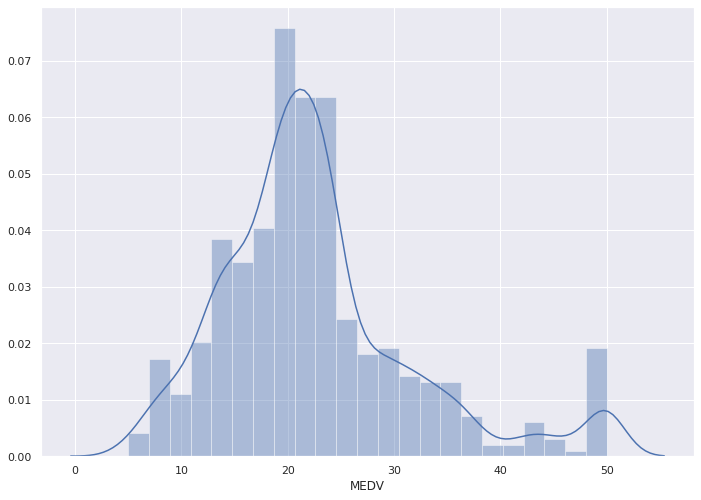

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(boston['MEDV'])                #agregamos los datos
plt.show()                                  #visualizamos el grafico

###matriz de correlación 
para medir las relaciones lineales entre las variables y de esa forma determinar que valores son más practicos para entregar un modelo de regresión lineal.

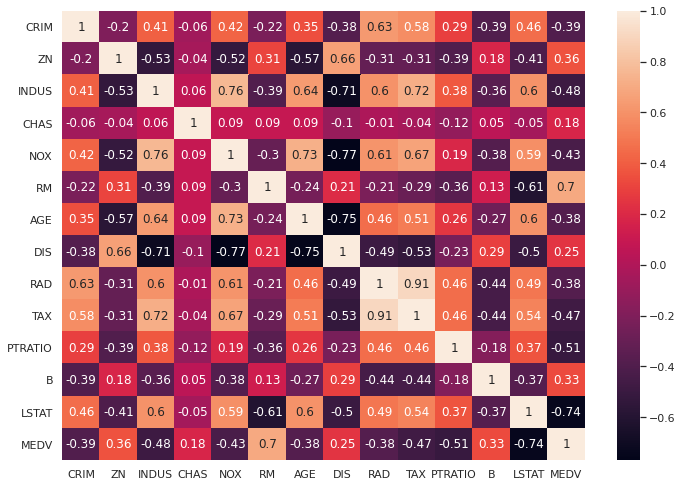

In [16]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

Se deben seleccionar aquellas características que tienen una alta correlación (ya se positiva o negativa) con nuestra variable de destino (MEDV). 

Entre 0.7 a 0.74 sea positivo o negativo:
MEDV 	<->	RM
MEDV	<->	LSTAT
Se deben descartar las características que tengan multi-colinealidad (correlación utópica que solo se podría dar en laboratorio), son aquellas que tengan valores superiores 0,74:
RAD<->TAX 
DIS<->AGE

Usaremos un gráfico de dispersión para ver cómo estas características varían 

RM vs MEDV
LSTAT vs MEDV


### Graficando variables descartadas


#### descartando RAD vs TAX 


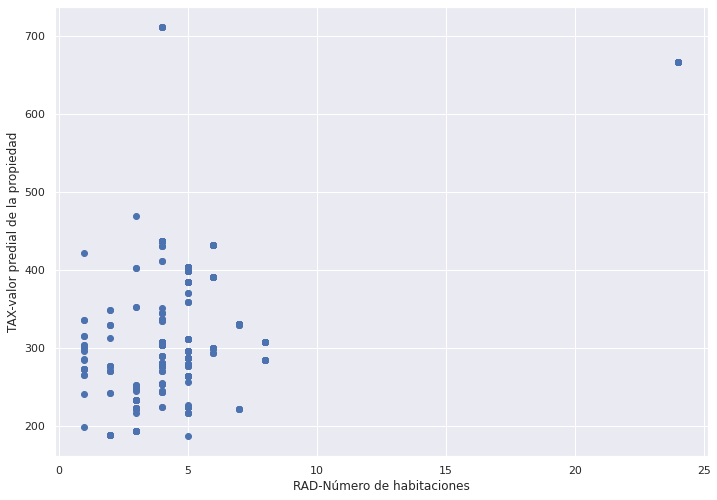

In [19]:
X = boston['RAD']
y = boston['TAX']
plt.scatter(X, y)
plt.xlabel('RAD-Número de habitaciones')
plt.ylabel('TAX-valor predial de la propiedad')
plt.show()

####descartando DIS vs AGE

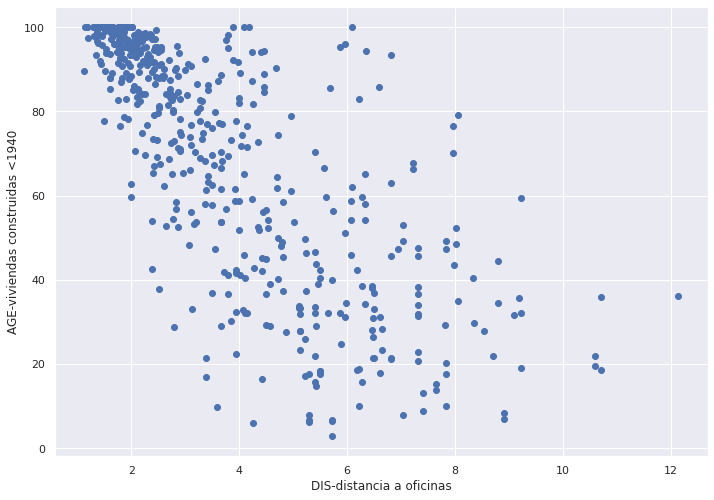

In [20]:
X = boston['DIS']
y = boston['AGE']
plt.scatter(X, y)
plt.xlabel('DIS-distancia a oficinas')
plt.ylabel('AGE-viviendas construidas <1940')
plt.show()

###Graficando variables seleccionadas

#### MEDV vs RM

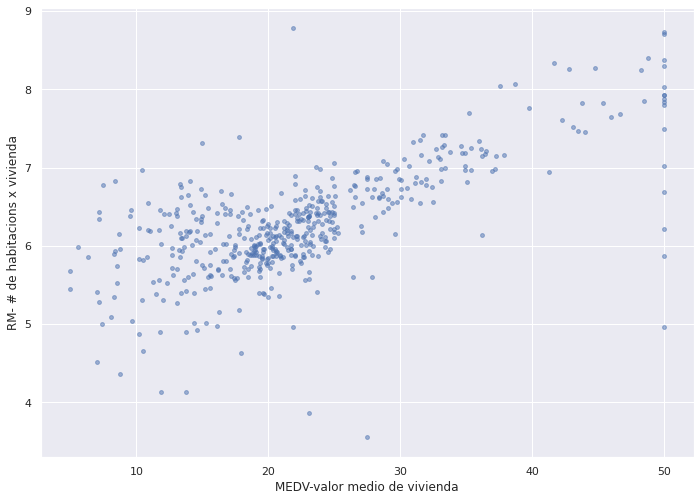

In [25]:
X = boston['MEDV']
y = boston['RM']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('RM- # de habitacions x vivienda')
plt.show()

####LSTAT vs MEDV


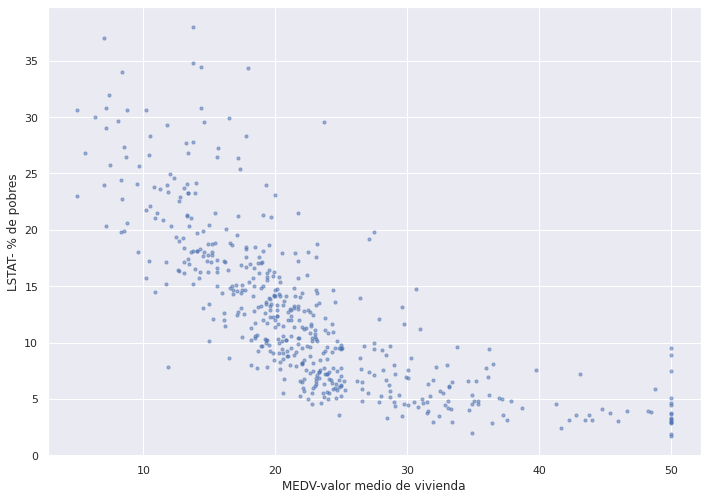

In [23]:
X = boston['MEDV']
y = boston['LSTAT']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('LSTAT- % de pobres')
plt.show()

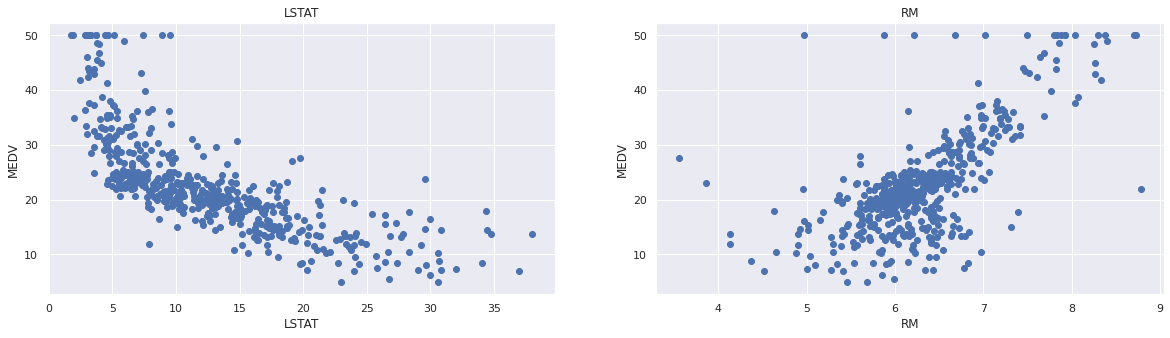

In [26]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### 8. Preparación de los datos para el entrenamiento del modelo

Regresión lineal:


> Y = mX + b


Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el “punto de corte con el eje Y” en la gráfica (cuando X=0)
> Concatenamos las columnas que seleccionamos para entrenar:
X = LSTAT y RM
Y = MEDV



In [114]:
#Entrenando con una sola variable en X

#X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
#X = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])

#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### 9. Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))


x80%: (404, 2), x20%: (102, 2)
y80%: (404,), y20%: (102,)


###10.entrenando un modelo de regresión lineal


In [116]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 11.Evaluación del modelo
Evaluamos el modelo utilizando RMSE y R2-score.


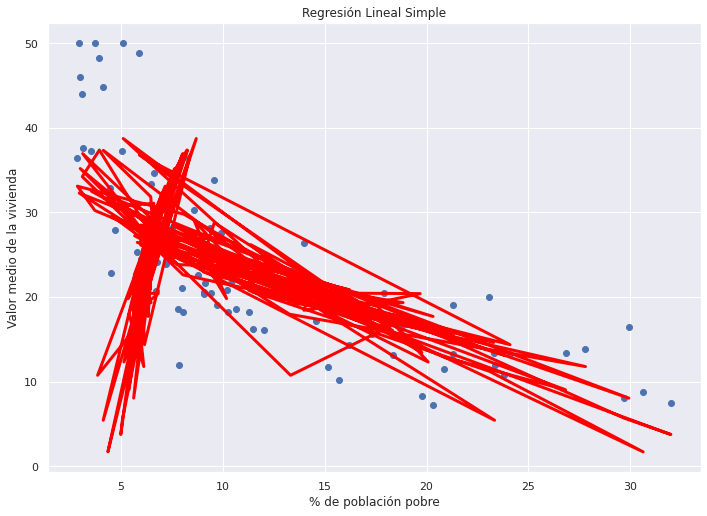


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.6224960438968672


In [118]:
# poner a prueba la maquina (modelo)
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['LSTAT'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# evaluación del modelo para el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("El modelo de rendimiento para el conjunto de entrenamiento.")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de pruebas")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 resultado es {}'.format(r2))

El modelo de rendimiento para el conjunto de entrenamiento.
--------------------------------------
RMSE es 5.6371293350711955
R2 resultado es 0.6300745149331701


El rendimiento del modelo para el conjunto de pruebas
--------------------------------------
RMSE es 5.137400784702911
R2 resultado es 0.6628996975186952


##Regresión lineal para Load_boston Versión 2

In [ ]:
#https://github.com/lucko515/regression-python/tree/master/Boston%20and%20Diabetes%20datasets%20Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline
boston_data = datasets.load_boston()
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#---visualización de los datos con graficos estadisticos--
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
features_plot = boston_data.feature_names
sns.pairplot(boston_df[features_plot], height=2.0);
plt.tight_layout()
plt.show()

###Separar los datos (TRAIN, TEST)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Y = boston_data.target
X = boston_df.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("X_train shape -> {}".format(X_train.shape))
print("y_train shape -> {}".format(y_train.shape))
print("X_test shape -> {}".format(X_test.shape))
print("y_test shape -> {}".format(y_test.shape))

X_train shape -> (404, 13)
y_train shape -> (404,)
X_test shape -> (102, 13)
y_test shape -> (102,)


###Aplicar regressión lineal

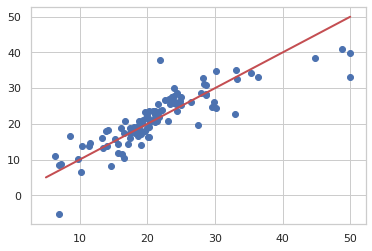

Precisión del modelo: 0.7285874126670874


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
#visualizar la predicción en los datos de testeo
plt.scatter(y_test, pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(X_test, y_test)))

##Regresión lineal load_diabetes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
datadiabetes = datasets.load_diabetes()
print(datadiabetes.DESCR)

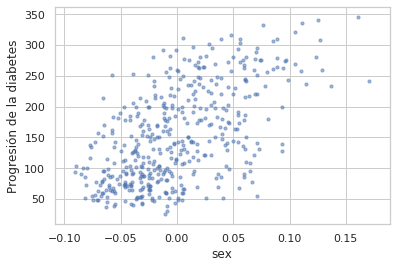

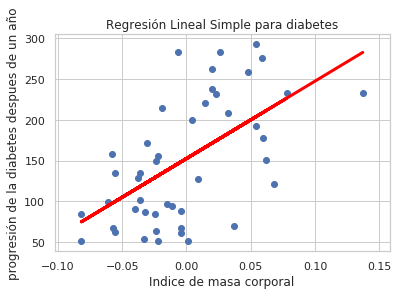


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.34391153943607766


In [ ]:
X = datadiabetes.data[:, np.newaxis, 2] 
Y = datadiabetes.target
colores = np.random.rand(100)
plt.xlabel('sex')
plt.ylabel('Progresión de la diabetes')
plt.scatter(X,Y, s=10, alpha=0.5)
plt.show()

# Separar datos (entrenamiento, test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
lr = linear_model.LinearRegression()
# entrenar la maquina (modelo) para que conozca la realidad
lr.fit(X_train, y_train)
# poner a prueba la maquina (modelo)
Y_pred = lr.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple para diabetes')
plt.xlabel('Indice de masa corporal')
plt.ylabel('progresión de la diabetes despues de un año')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lr.score(X_train, y_train))


##Regresión logistica dataset cancer_breast  (cancer de seno)

In [ ]:
#Se importan la librerias a utilizar
from sklearn import datasets    
import pandas as pd             #libreria para manejo de matrices 
import seaborn as sns           #libreria para generación de graficos estadisticos
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #requerido para separar los datos
from sklearn.preprocessing import StandardScaler # para escalar todos los datos
########## PREPARAR LA DATA ##########
#Importamos los datos de la misma librería de scikit-learn
dataCancer = datasets.load_breast_cancer()

###Entendiendo la data

In [ ]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(dataCancer.keys())
#Verifico las características del dataset
print('Características del dataset:')
print(dataCancer.DESCR)

###convierto el dataset en un dataframe tipo panda (facilita su manejo)

In [ ]:
#convierto el dataset en un dataframe tipo panda (facilita su manejo)
cancer_df = pd.DataFrame(dataCancer.data)
cancer_df.columns = dataCancer.feature_names
cancer_df["target"]=dataCancer.target   #agregamos la columna de target al dataframe
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


###Visualizando la data en graficos

In [ ]:
sns.set(style='whitegrid', context='notebook')
features_plot = cancer_df.columns
sns.pairplot(cancer_df[features_plot], height=2.0);
plt.tight_layout()
plt.show()

###Entendiendo la data con graficos

In [ ]:
sns.lmplot('mean radius', 'target', data=cancer_df, fit_reg=False)

In [ ]:
del cancer_df["target"]

###Separando datos de entrenamiento y de prueba

In [ ]:
#Seleccionamos todas las columnas
X = dataCancer.data
#Defino los datos correspondientes a las etiquetas
y = dataCancer.target
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Escalo los datos (estandarizo los datos en valores)

In [ ]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["City name", "Area", "Population", "Annual Rainfall"]

x.add_row(["Adelaide", 1295, 1158259, 600.5])
x.add_row(["Brisbane", 5905, 1857594, 1146.4])
x.add_row(["Darwin", 112, 120900, 1714.7])
x.add_row(["Hobart", 1357, 205556, 619.5])
x.add_row(["Sydney", 2058, 4336374, 1214.8])
x.add_row(["Melbourne", 1566, 3806092, 646.9])
x.add_row(["Perth", 5386, 1554769, 869.4])

print(x)

+-----------+------+------------+-----------------+
| City name | Area | Population | Annual Rainfall |
+-----------+------+------------+-----------------+
|  Adelaide | 1295 |  1158259   |      600.5      |
|  Brisbane | 5905 |  1857594   |      1146.4     |
|   Darwin  | 112  |   120900   |      1714.7     |
|   Hobart  | 1357 |   205556   |      619.5      |
|   Sydney  | 2058 |  4336374   |      1214.8     |
| Melbourne | 1566 |  3806092   |      646.9      |
|   Perth   | 5386 |  1554769   |      869.4      |
+-----------+------+------------+-----------------+


###implemento el algoritmo de regresión logistica

In [ ]:
#Defino el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

###Calculo y visualizo los resultados

In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', precision)
print('Exactitud del modelo:', exactitud)

Precisión del modelo: 0.9459459459459459
Exactitud del modelo: 0.9649122807017544


###Verificar la predicción con los datos

In [ ]:
prediction = pd.DataFrame()
prediction['actual'] = dataCancer.target_names[y_test]
prediction['predicted'] = dataCancer.target_names[y_pred]
prediction['correct?'] = prediction['actual'] == prediction['predicted']

print ('\nPredicción para los primeros 20 registros del grupo de test:')
print (prediction.head(30))


Predicción para los primeros 20 registros del grupo de test:
       actual  predicted  correct?
0      benign     benign      True
1   malignant  malignant      True
2      benign     benign      True
3      benign     benign      True
4      benign     benign      True
5      benign     benign      True
6      benign     benign      True
7   malignant  malignant      True
8      benign     benign      True
9      benign     benign      True
10     benign     benign      True
11  malignant  malignant      True
12  malignant  malignant      True
13     benign     benign      True
14     benign     benign      True
15     benign     benign      True
16     benign     benign      True
17  malignant  malignant      True
18  malignant  malignant      True
19     benign     benign      True
20  malignant  malignant      True
21     benign     benign      True
22  malignant  malignant      True
23     benign     benign      True
24  malignant  malignant      True
25     benign     benign    

##**load_wine () :**
Donde los datos son los resultados de un análisis químico de vinos cultivados en la misma región en Italia por tres cultivadores diferentes. Hay trece medidas diferentes tomadas para diferentes componentes que se encuentran en los tres tipos de vino (Clase1: Pinot Noir,  clase 2: Cabernet  y clase 3: Merlot .) ubicados en el target


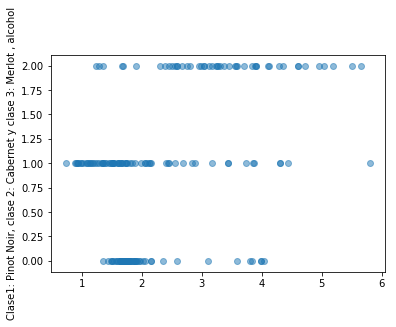

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

vinos= load_wine()
#print(vinos.DESCR)
Alcohol= vinos.data[:,1]
clases= vinos.target
colores = np.random.rand(100)
plt.ylabel("Clase1: Pinot Noir, clase 2: Cabernet y clase 3: Merlot , alcohol")
plt.scatter(Alcohol,clases, alpha=0.5)
plt.show()

# Vectorizacion de texto

Vectorizando texto plano

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
new_text = ['La ceremonia comienza sin darnos cuenta, cuando ni siquiera hemos entrado a la sala. Esperamos en un salón lleno de velas hasta que oímos la voz de una niña que llama: "¡Castaño, Castaño!". Es la diosa Manisalva, que entra jugando con su perro. El juego es extraño: ella nos pide que le ayudemos a apagar velas y el animal, tenebrosamente humano, le ayuda']
vector= CountVectorizer(stop_words=None)
vector.fit(new_text)
print(vector.vocabulary_)


{'la': 26, 'ceremonia': 5, 'comienza': 6, 'sin': 40, 'darnos': 10, 'cuenta': 9, 'cuando': 8, 'ni': 31, 'siquiera': 41, 'hemos': 22, 'entrado': 17, 'sala': 38, 'esperamos': 19, 'en': 15, 'un': 44, 'salón': 39, 'lleno': 29, 'de': 11, 'velas': 46, 'hasta': 21, 'que': 37, 'oímos': 34, 'voz': 47, 'una': 45, 'niña': 32, 'llama': 28, 'castaño': 4, 'es': 18, 'diosa': 12, 'manisalva': 30, 'entra': 16, 'jugando': 25, 'con': 7, 'su': 42, 'perro': 35, 'el': 13, 'juego': 24, 'extraño': 20, 'ella': 14, 'nos': 33, 'pide': 36, 'le': 27, 'ayudemos': 3, 'apagar': 1, 'animal': 0, 'tenebrosamente': 43, 'humano': 23, 'ayuda': 2}


**P2T1:** vectorizando un dataset de noticias, para este ejercicio usaremos :  **sklearn.datasets.fetch_20newsgroups**, como DataSet que tiene:
*   Conjunto de entrenamiento número de muestras: 11,314 documentos.
*   Conjunto de pruebas número de muestras: 7.532 documentos

Ademas de eso usaremos otras librerias que seran de gran utilidad:
*   **Train_test_split**, para dividir el dataset en un grupo para estrena y otro para probar el modelo.
*   **CountVectorizer**, para vectorizar el texto.
*   **LogisticRegression**, como algoritmo para entrenamiento (existen mejores....los veremos despues)



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

ahora empezamos  consumir el DATASET, eliminando los encabezados, pies de pagina y citas que no aportan al analisis del texto que trae las cada una de las noticias

In [ ]:
noticias= fetch_20newsgroups(subset="train",remove = ('headers', 'footers', 'quotes'))

Miremos algunos registros y el tamaño del dataset

In [ ]:

print("Información de la noticia 0 ")
noticias.data[0]   #esto es solo para el ejemplo (no aporta nada, solo chismosear)


Información de la noticia 0 


'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

¿que tipo de clasificaciones estan ya definidas en la DATASET?

In [ ]:
noticias.target_names

ahora lo ¡divertido! a vectorizaaaaaar

In [ ]:
vector= CountVectorizer()
vector.fit(noticias.data)   #aca tokenizamos toda la data


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

En el proceso de tokanizar se crearn Tokens de palabras que no aportan nada al modelo....y entonces que podemos hacer...??...facil eliminarlas...:-P ....y esa es la tarea mejorar el proyecto implementando la libreria NLTK pero ahora lo haremos de la forma clasica (usando comando como el STOP_WORDS)


In [ ]:
print(vector.vocabulary_)   #mostrar los token que se crearon 

Output hidden; open in https://colab.research.google.com to view.

ahora vamos a crear una matriz donde este por cada fila el texto y en las columnas las palabras de todaaaaaaaaaa la tokenización

In [ ]:
vector_palabras= vector.transform(noticias.data)
vector_palabras.shape

(11314, 101631)

con la matriz creada, vamos a crear otro vector con las clasificaciones que vienen por defecto en el DATASET

In [ ]:
clasificaciones= noticias.target

y ahora si, lo nuevo.....el entrenamientooooo...donde:

*   Xentrena= Valores de X en la matriz=vector_palabras
*   Xtesting = Valores de Y en la matriz= vector_palabras
*    Yentrena=Valores de X en la matriz= clasificaciones
*    Ytesting = Valores de Y en la matriz= clasificaciones




In [ ]:
Xentrena,Xtesting,Yentrena,Ytesting=train_test_split(vector_palabras,clasificaciones)

una vez cargados los datos en cada variable, divididos según sea X o Y para cada matriz.....viene la matemática que tanto amamos.


1.   Creamos un variable RegLog para hacer regresión logistica (la mas facil)
2.  Aplicaremos la regresión a las variables de entrenamiento (Xentrena, Yentrena)




In [ ]:
RegLog= LogisticRegression() #el parentesis trae comandos que nos ayudara a mejorar la funcionalidad
RegLog.fit(Xentrena, Yentrena) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Vamos a ver que tipo de acertabilidad se logró aplicando este metodo.

In [ ]:
RegLog.score(Xentrena,Yentrena)

0.9723040659988215

y con esto terminamos?.....obvio noooooooooooooo.....ahora hay que exportar ese modelo....y probarlo con datos de testing.

# Guardando un modelo para utilizarlo luego.

Para exportar e importar modelos de machine learning usaremos la libreria **joblib** de **sklearn.externals**.....(más facil de lo que parece)

In [ ]:
from sklearn.externals import joblib

y ahora con una sola linea de código exportamos el modelo...

In [ ]:
joblib.dump(RegLog, 'modelo_vector_texto.pkl')

['modelo_vector_texto.pkl']

y donde quedo el archivo?....El problema es que como estamos trabajando en una maquina virtual que google nos presto....nos toca bajar el archivo a nuestra maquina local.

In [ ]:
from google.colab import files
files.download('modelo_vector_texto.pkl')

# Cargando un modelo y probando su efectividad

usaremos las mismas librerias para guardar y descargar el PKL, pero antes debemos usar el archivo que debemos Montar la unidad de google drive en nuestra maquina virtual

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from sklearn.externals import joblib
from sklearn.datasets import fetch_20newsgroups
noticiasTest= fetch_20newsgroups(subset="test")

Cargamos el archivo que debe estar en una de las carpetas de drive

In [ ]:
RegLogTest= joblib.load ('/content/gdrive/My Drive/Colab Notebooks/modelo_vector_texto.pkl')

Y ahora lo faciiiiiiiiiiiiiiiiiiiiiil.....probar el modelo en datos de test

In [ ]:
vectorTest= CountVectorizer()
vectorTest.fit(noticiasTest.data)   #aca tokenizamos toda la data de test


# Vectorizando texto versión2

La unica diferencia con la versión 1, es que no se utilizara **CountVectorizer** sino **TfidfVectorizer** que es una tecnica Tf-idf donde es usa una medida numérica que expresa cuán relevante es una **palabra** para un documento en una colección. Esta medida se utiliza a menudo como un factor de ponderación en la recuperación de información y la minería de texto.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
noticias_train = fetch_20newsgroups (subset = 'train', remove = ('headers', 'footers', 'quotes'))
noticias_test = fetch_20newsgroups (subset = 'test')
vectorizador = TfidfVectorizer (max_df = 0.8, min_df = 3, ngram_range = (1, 2))



*   **max_df**: al crear el vocabulario, ignore los términos que tienen una frecuencia de documentos mayor que el umbral dado (porcentaje de documentos)
*   **min_df**: al crear el vocabulario, ignore los términos que tienen una frecuencia de documento inferior al umbral dado (porcentaje de documentos). Aquí utilizamos el uni-gramo y bi-gramo.



In [ ]:
vector_train = vectorizador.fit_transform(noticias_train.data)
vector_train.shape

(11314, 123072)

In [ ]:
clf = MultinomialNB(alpha=.01)
#from sklearn.linear_model import LogisticRegression
#clf= LogisticRegression()

In [ ]:
clf.fit (vector_train, noticias_train.target) 

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

Predecir el conjunto de pruebas

In [ ]:
vectors_test = vectorizador.transform (noticias_test.data)

In [ ]:
pred = clf.predict (vectors_test) 

Probando la precisión del modelo.

In [ ]:
print('Exactitud: ', accuracy_score(noticias_test.target, pred)) 

Exactitud:  0.7777482740308019


guardar el modelo

In [ ]:
joblib.dump (vectorizador, "vector_texto.pkl")
from google.colab import files
files.download('vector_texto.pkl')

In [ ]:
joblib.dump (clf, "modelo2_vector_texto.pkl")  
from google.colab import files
files.download('modelo2_vector_texto.pkl')

Luego, en cualquier momento, simplemente CARGAMOS el modelo y el vectorizador y queda unicamente clasificar un nuevo texto normalmente

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
clfnew= joblib.load ('/content/gdrive/My Drive/Colab Notebooks/modelos/modelo2_vector_texto.pkl')
vectorizadorNew= joblib.load ('/content/gdrive/My Drive/Colab Notebooks/modelos/vector_texto.pkl')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Probando el modelo**

In [ ]:
new_text = ['space is cold, and the land is hot']
vectors_test = vectorizadorNew.transform(new_text)
pred = clfnew.predict(vectors_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(noticias_test.target, pred,target_names=noticias_test.target_names))
#print (classification_report(noticias_test.target, pred, noticias_test.target_names))
#from sklearn.metrics import confusion_matrix
#print (confusion_matrix(noticias_test.target, pred))

#PLN
http://www.corpus.unam.mx/cursopln/